# Name : Suyash Pratap Singh


# Reg ID : GO_STP_6412

# TASKS:-
Exploratory Data Analysis (EDA) of Titanic Survival Problem.

To do the same we will use the Pandas, Seaborn and Matplotlib library.

Dataset contains the details of the passengers who had boarded the ship.

### Importing the required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import warnings
import missingno as msno
from pingouin import plot_blandaltman
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dataset Understanding

In [6]:
df.ndim

2

In [7]:
df.shape

(891, 12)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Handing Missing Values

**Checking for missing values**

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Visualization of missing values**

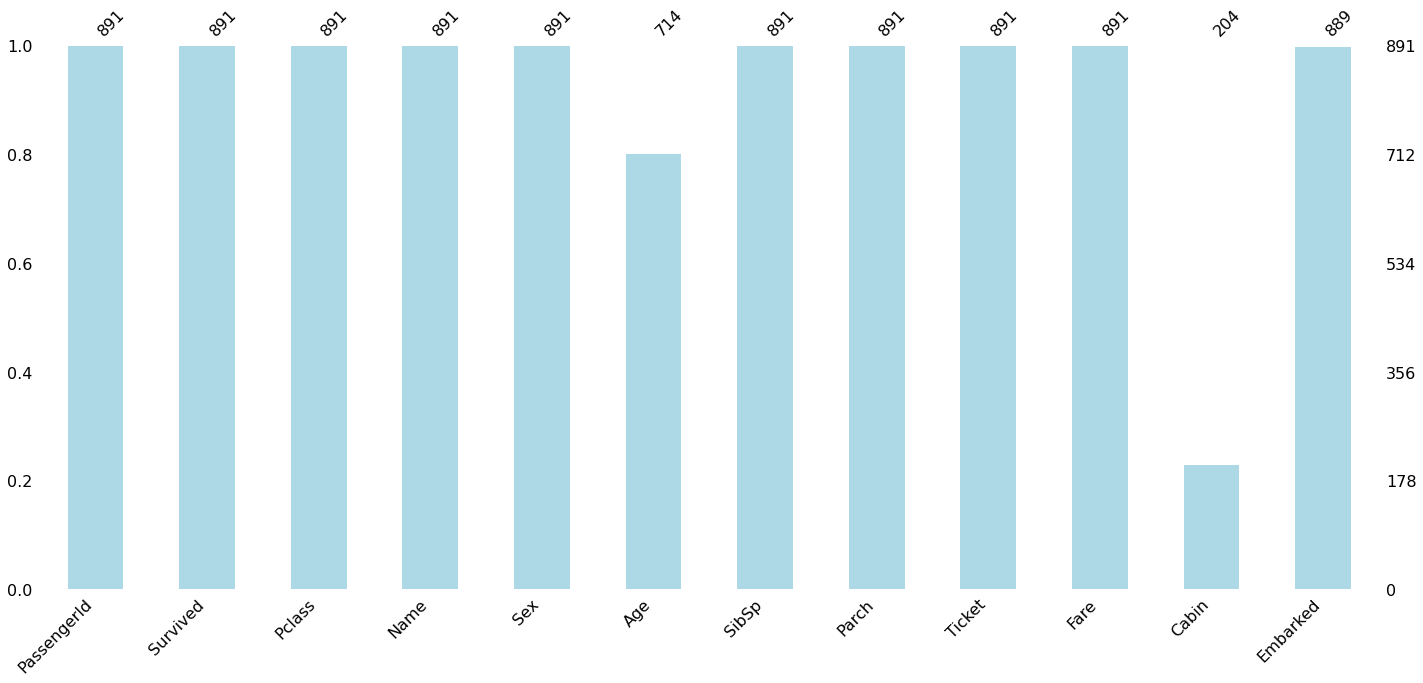

In [13]:
msno.bar(df,color='lightblue')
plt.show()

**Filling NaN values in age column by median value**

In [14]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.Age.isna().any()

False

**Filling NaN values in deck column by Random value choices**

In [15]:
np.random.seed(42)
df['Cabin'].fillna(np.random.choice(df.Cabin.unique()),inplace=True)
df['Cabin'].isna().any()

False

**Dropping NaN values in embark_town and embarked columns**

In [16]:
df.dropna(inplace=True)

**Re-checking for Missing values**

In [17]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

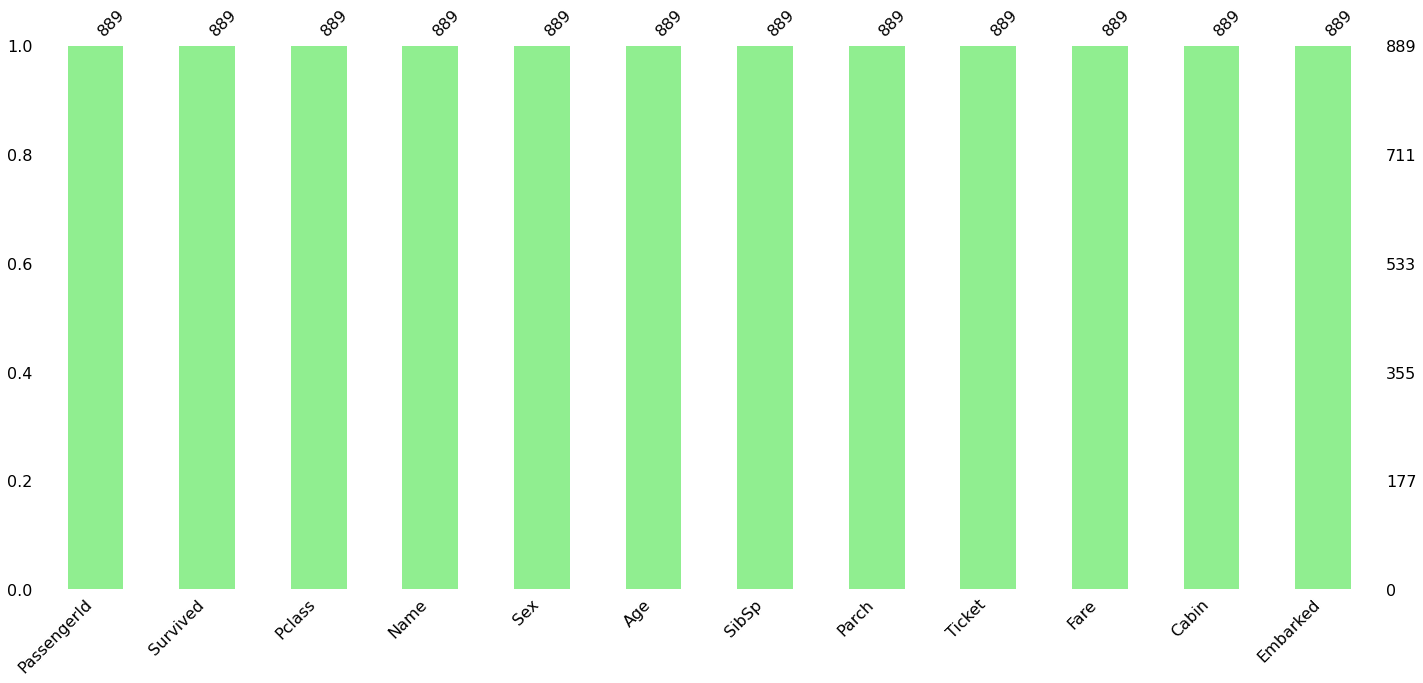

In [18]:
msno.bar(df,color='lightgreen')
plt.show()

**Value Counts for Categorical columns**

In [19]:
df['Survived'] = df.Survived.map({0 : 'Not Survived', 1 : 'Survived'})

In [20]:
df.Survived.value_counts()

Not Survived    549
Survived        340
Name: Survived, dtype: int64

In [21]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [22]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
df['Cabin'] = df.Cabin.astype(str)
df['Cabin'] = df.Cabin.str.get(0)
df.Cabin.value_counts()

E    719
C     59
B     45
D     33
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [24]:
df['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

**Group by survived**

In [25]:
df.groupby(['Survived','Sex']).mean()

PassengerId    Pclass        Age     SibSp     Parch  \
Survived     Sex                                                            
Not Survived female   434.851852  2.851852  25.666667  1.209877  1.037037   
             male     449.121795  2.476496  30.783120  0.440171  0.207265   
Survived     female   429.558442  1.926407  28.532468  0.519481  0.519481   
             male     475.724771  2.018349  27.382294  0.385321  0.357798   

                          Fare  
Survived     Sex                
Not Survived female  23.024385  
             male    21.960993  
Survived     female  51.695617  
             male    40.821484

In [26]:
df.groupby(['Survived','Sex']).var()

PassengerId    Pclass         Age     SibSp     Parch  \
Survived     Sex                                                              
Not Survived female  69443.877778  0.202778  147.518750  3.292901  1.936111   
             male    67790.068646  0.579746  154.209286  1.296199  0.361660   
Survived     female  64330.725918  0.694561  166.099485  0.546358  0.676793   
             male    59886.645770  0.851512  232.117957  0.405708  0.417091   

                            Fare  
Survived     Sex                  
Not Survived female   616.096313  
             male    1050.395086  
Survived     female  4137.923910  
             male    5091.674021

In [27]:
df.groupby(['Survived','Sex']).std()

PassengerId    Pclass        Age     SibSp     Parch  \
Survived     Sex                                                            
Not Survived female   263.522063  0.450309  12.145730  1.814635  1.391442   
             male     260.365260  0.761411  12.418103  1.138507  0.601382   
Survived     female   253.635025  0.833403  12.887959  0.739160  0.822674   
             male     244.717482  0.922774  15.235418  0.636952  0.645826   

                          Fare  
Survived     Sex                
Not Survived female  24.821287  
             male    32.409799  
Survived     female  64.326697  
             male    71.355967

### Data Visualization

In [29]:
def plot_numerical(var):
    fig, axes = plt.subplots(2,2,figsize=(14,10))
    sns.histplot(x = df[var], ax = axes[0][0],bins=20)
    sns.kdeplot(x = df[var], ax = axes[0][1],fill=True)
    sns.violinplot(x = df.Survived,y = df[var], ax = axes[1][0],palette = 'tab10')
    plot_blandaltman(x=df.Fare, y=df[var], ax=axes[1][1])
    plt.suptitle(var.title())
    plt.show()

In [30]:
def plot_kde(var):
    facet = sns.FacetGrid(df, hue="Survived",aspect=4,palette='bright')
    facet.map(sns.kdeplot,var,shade= True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
    plt.title(var.title())
    plt.show()

In [31]:
def plot_categorial(var):
    fig,ax=plt.subplots(nrows=2, ncols=2,figsize=(14,10))
    df[var].value_counts().plot.pie(autopct='%.0f%%',labels=df[var].unique(),shadow = True,
                               startangle = 180,ax=ax[0][0])

    df[var].value_counts().plot.barh(ax=ax[0][1])
    sns.countplot(x = df.Survived, hue = df[var],palette = 'viridis',ax=ax[1][0])
    sns.stripplot(x=df[var],y=df.Fare,hue=df.Survived, ax=ax[1][1],palette = 'magma')
    fig.suptitle(var.title())
    plt.show()

In [32]:
numerical_columns = ['Age','SibSp','Parch','Fare']

In [33]:
categorical_columns = ['Survived','Sex','Embarked']

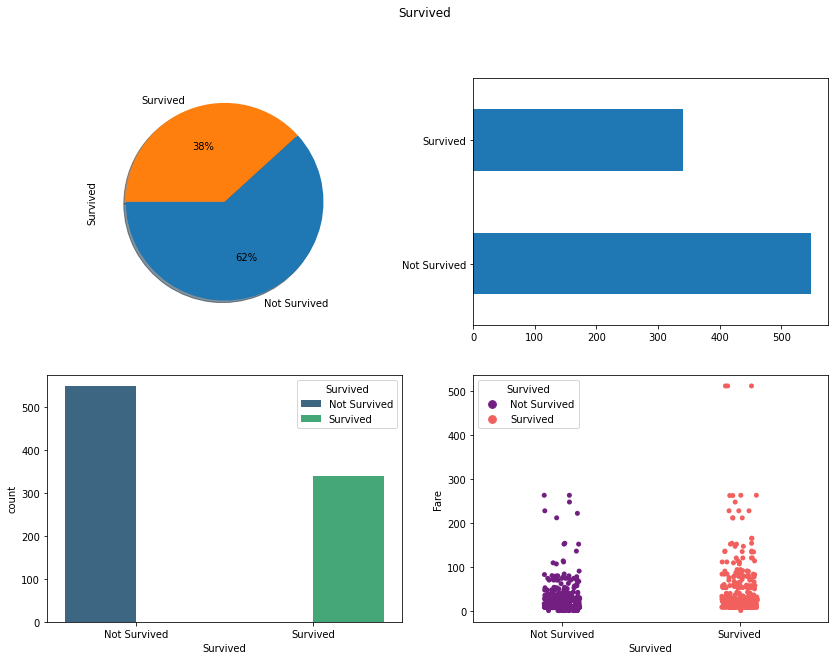

In [34]:
plot_categorial(categorical_columns[0])

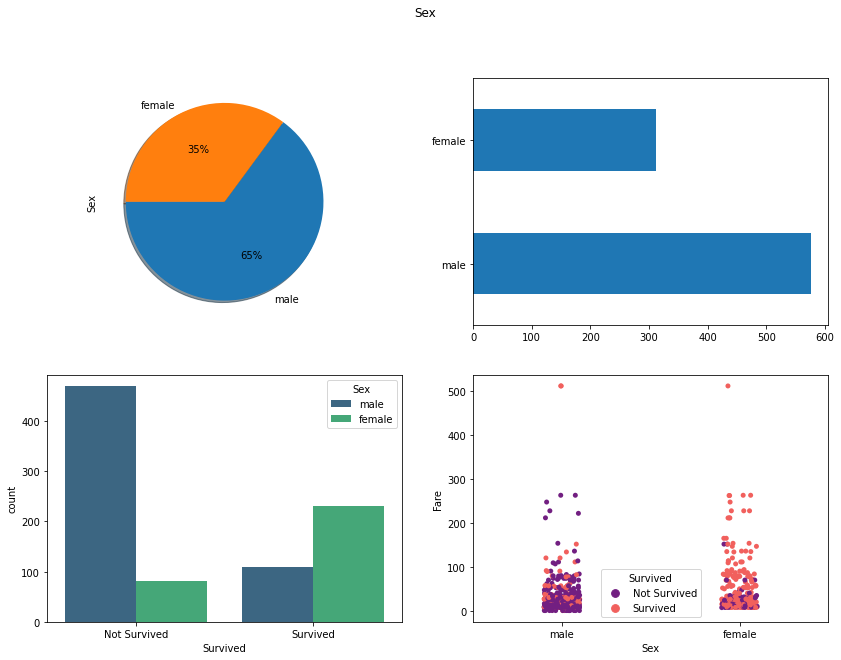

In [35]:
plot_categorial(categorical_columns[1])

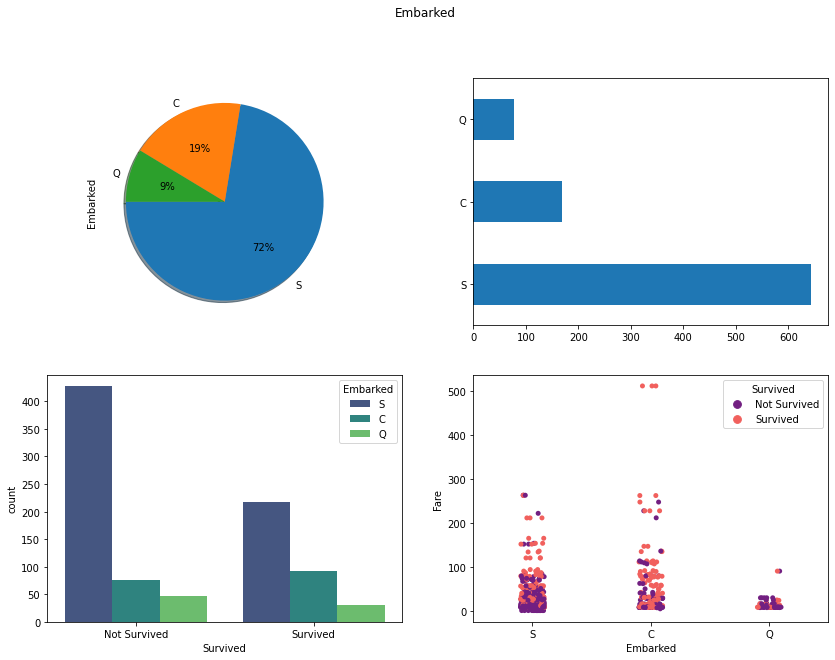

In [36]:
plot_categorial(categorical_columns[2])

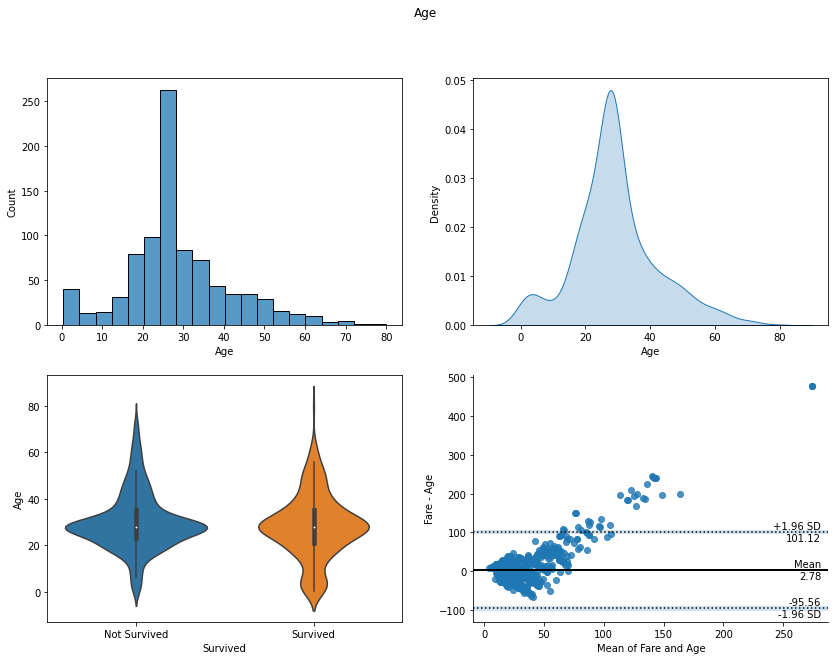

In [37]:
plot_numerical(numerical_columns[0])

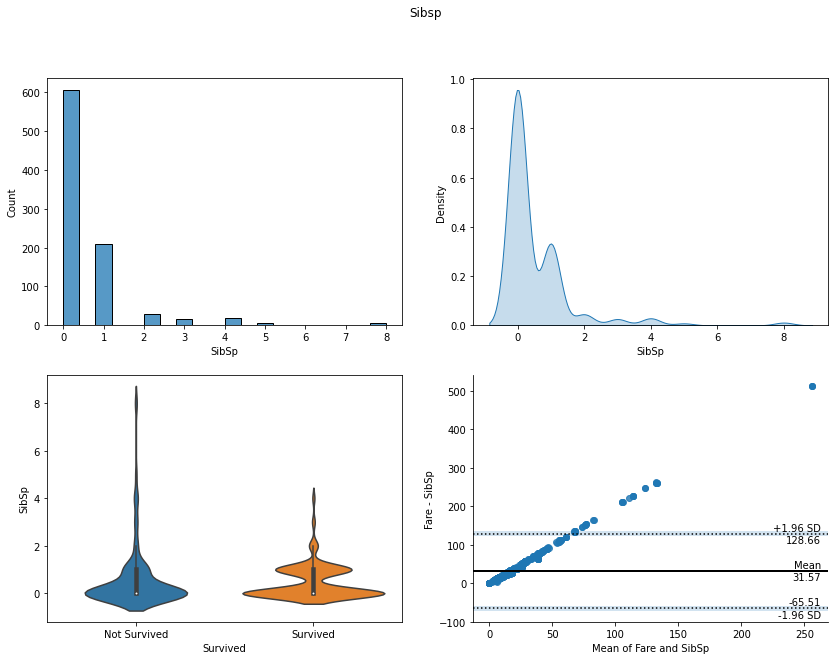

In [38]:
plot_numerical(numerical_columns[1])

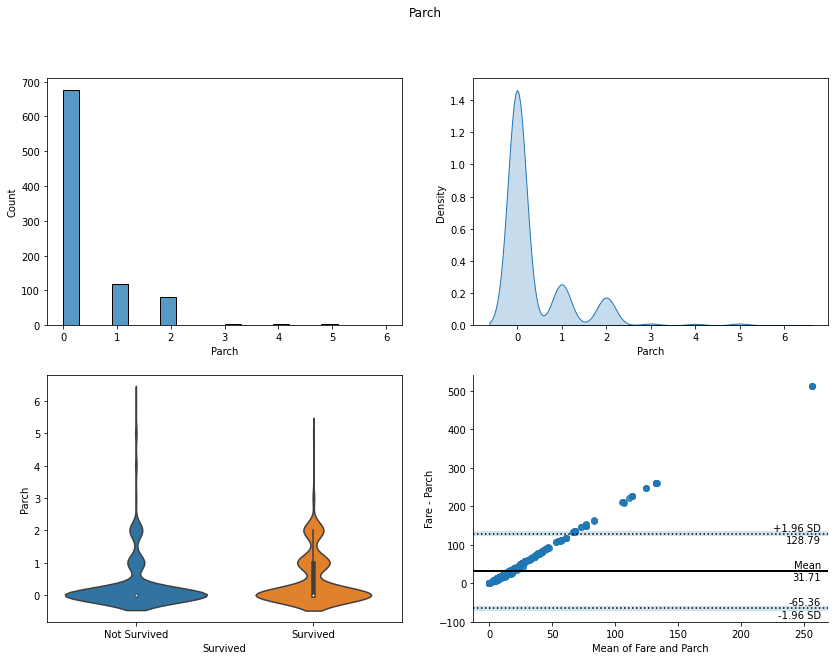

In [39]:
plot_numerical(numerical_columns[2])

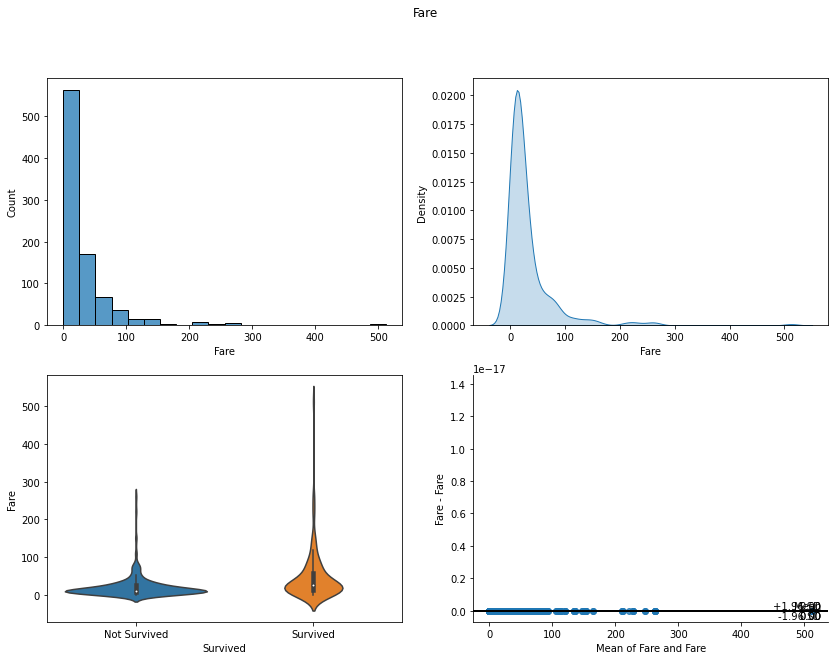

In [40]:
plot_numerical(numerical_columns[3])

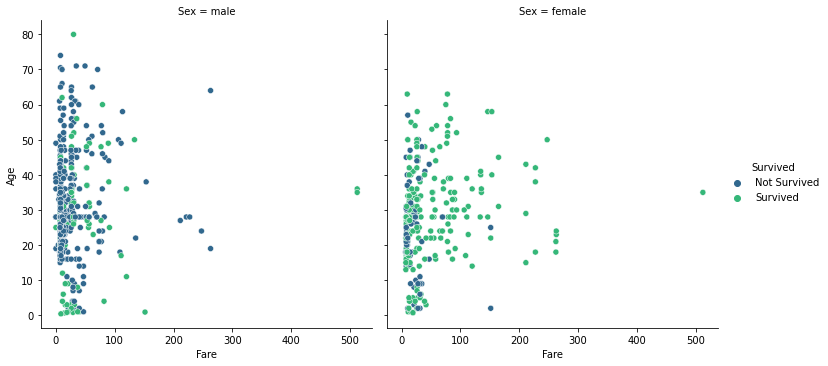

In [41]:
sns.relplot(x=df.Fare, y=df.Age, hue=df.Survived, col=df.Sex, palette='viridis')
plt.show()

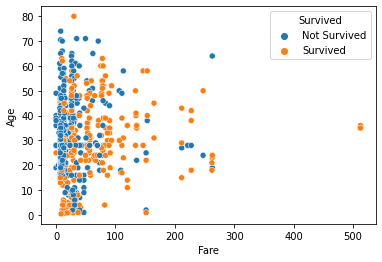

In [44]:
sns.scatterplot(x=df.Fare, y=df.Age, hue=df.Survived)
plt.show()

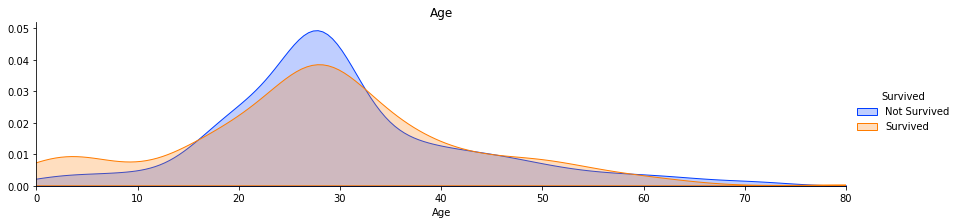

In [38]:
plot_kde(numerical_columns[0])

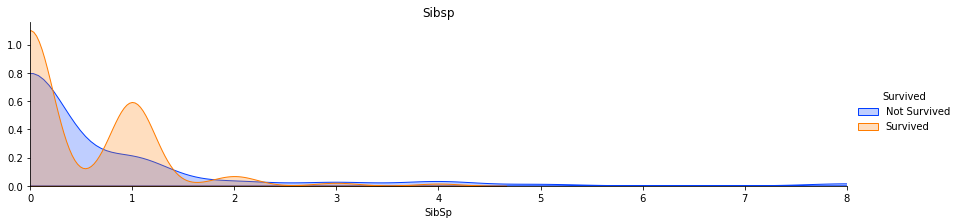

In [39]:
plot_kde(numerical_columns[1])

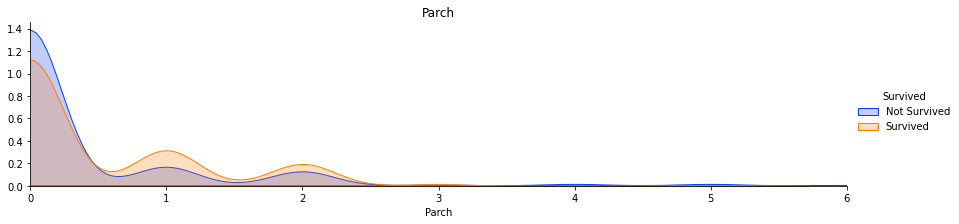

In [40]:
plot_kde(numerical_columns[2])

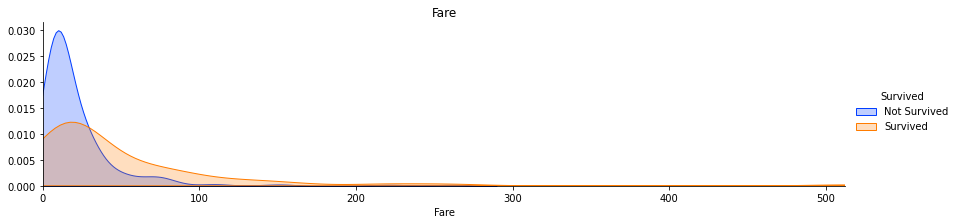

In [41]:
plot_kde(numerical_columns[3])

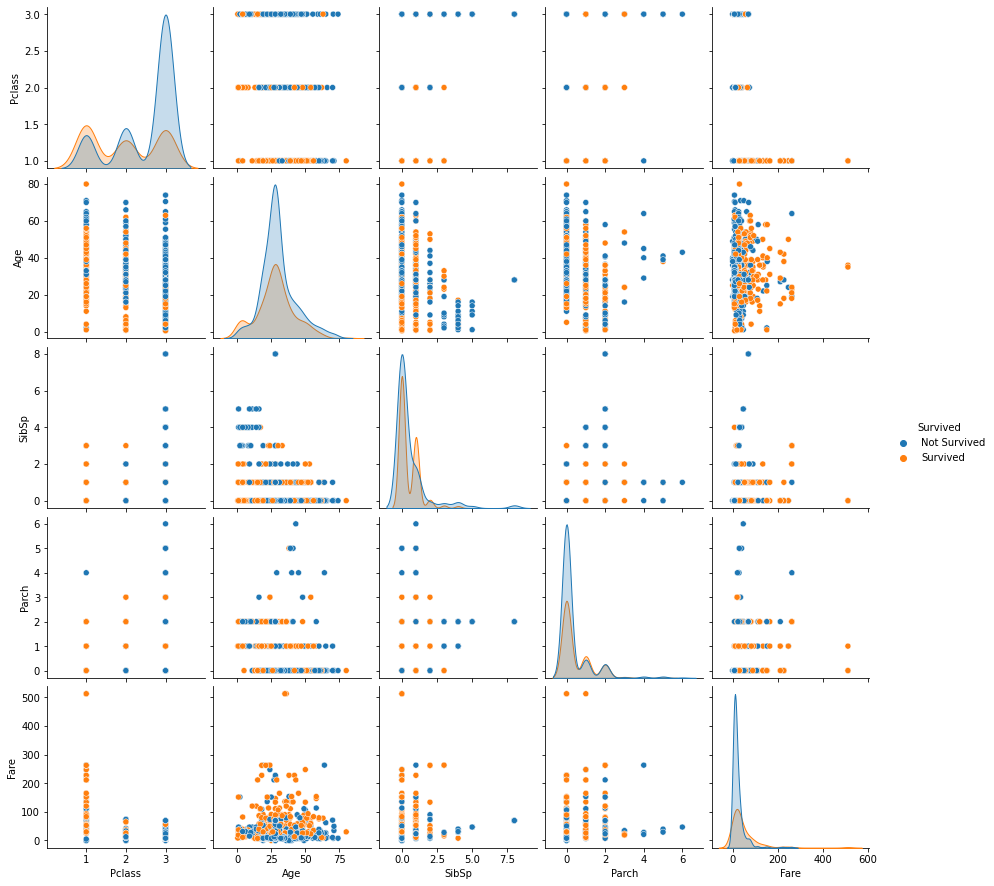

In [42]:
sns.pairplot(df,hue='Survived')
plt.show()

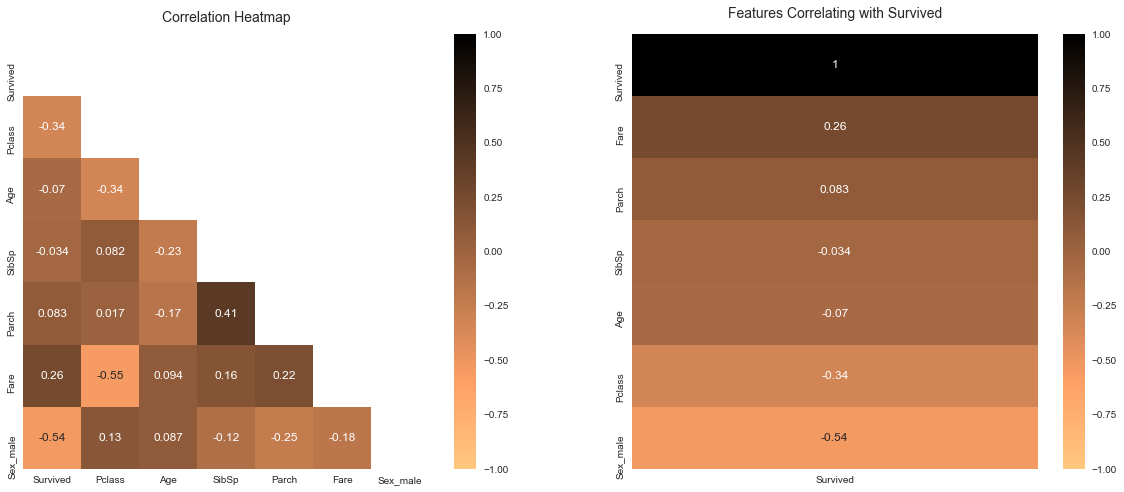

In [48]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True,ax=ax[0],cmap='copper_r')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

heatmap = sns.heatmap(resign_corr[['Survived']].sort_values(by='Survived', ascending=False),
                      vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='copper_r')
heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize':14}, pad=16)
plt.show()

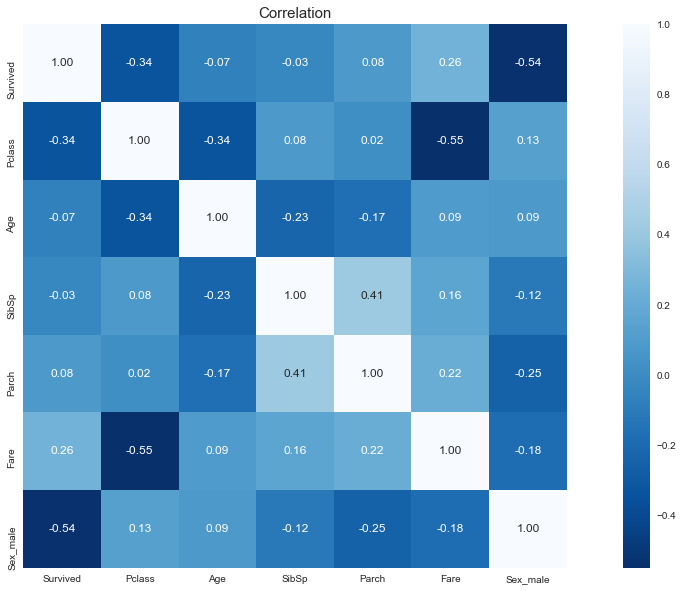

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,fmt =".2f",square=True,cmap='Blues_r')
plt.title("Correlation",size = 15)
plt.show()

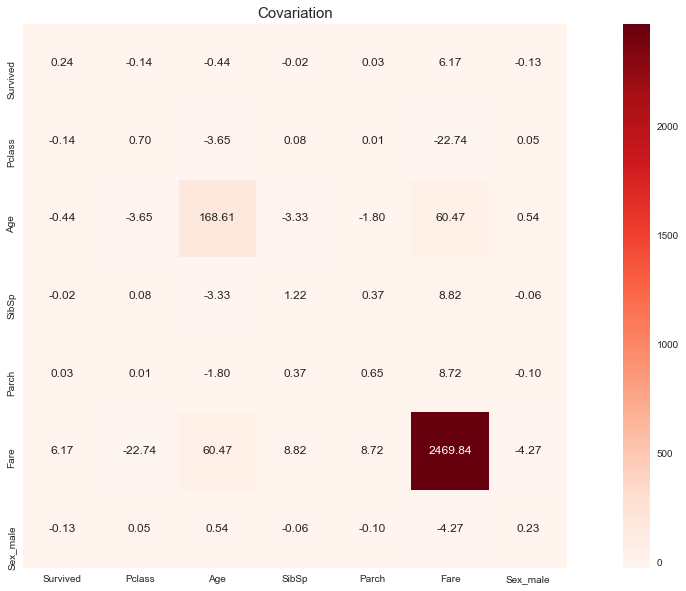

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(df.cov(), annot=True,fmt =".2f",square=True,cmap='Reds')
plt.title("Covariation",size = 15)
plt.show()

# THANK YOU